In [66]:
import os
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

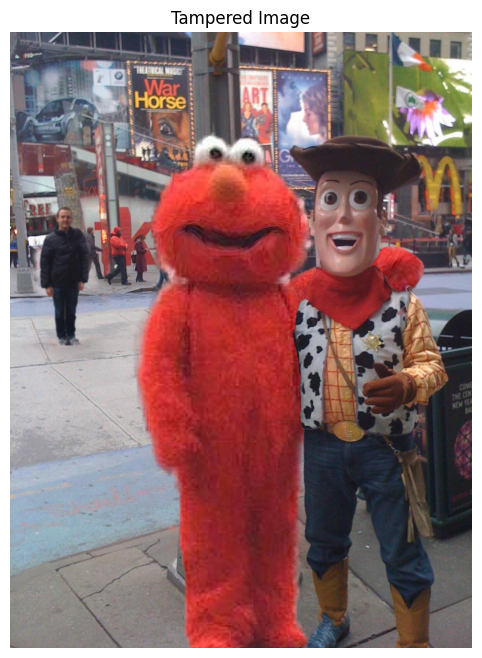

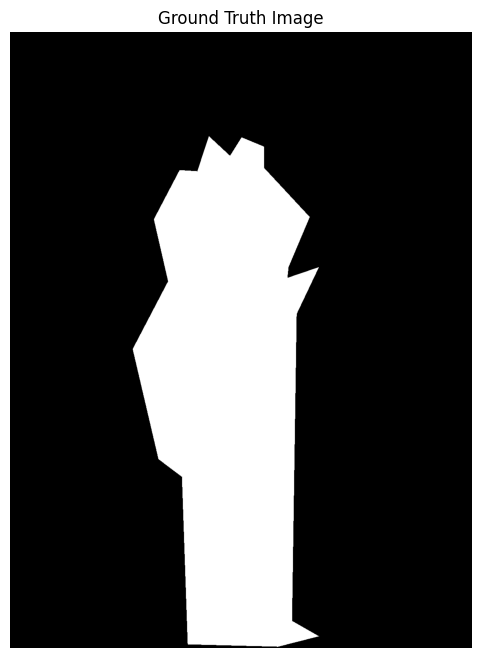

In [67]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "im1_edit3"

tp_img = cv2.imread(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = cv2.imread(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img, "Tampered Image")
plot_image(gt_img, "Ground Truth Image")

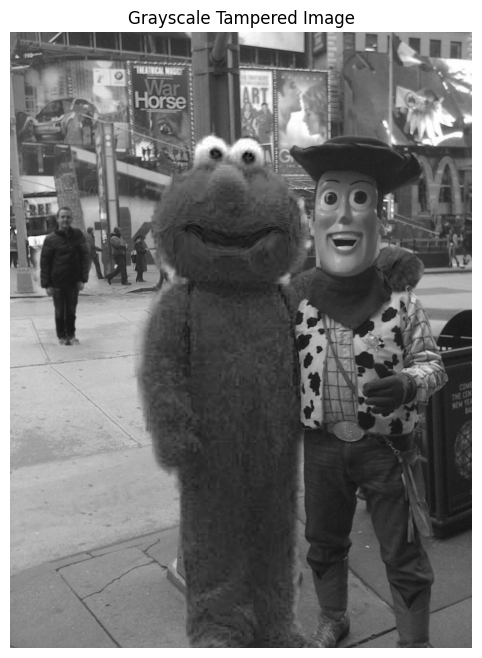

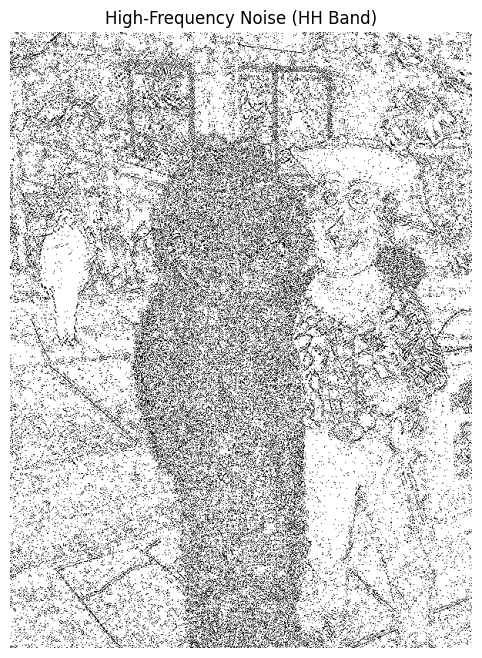

In [69]:
tp_img_gray = cv2.cvtColor(tp_img, cv2.COLOR_RGB2GRAY)

coeffs2 = pywt.dwt2(tp_img_gray, 'haar')
LL, (LH, HL, HH) = coeffs2

HH_normalized = (HH - HH.min()) / (HH.max() - HH.min())

threshold = 0.5
HH_mask = HH_normalized > threshold

plot_image(tp_img_gray, "Grayscale Tampered Image")
plot_image(HH_mask, "High-Frequency Noise (HH Band)")

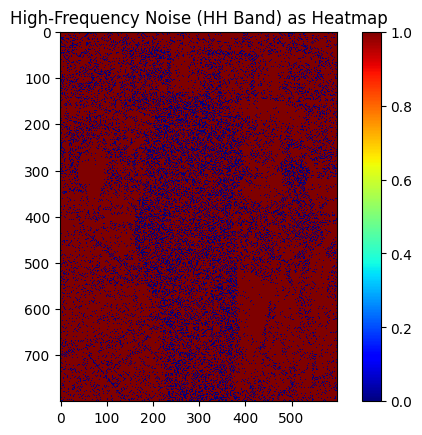

In [ ]:
plt.imshow(HH_mask, cmap='jet', interpolation='nearest')
plt.title('High-Frequency Noise (HH Band) as Heatmap')
plt.colorbar()